In [1]:
# make figures for Thalamic model 

In [2]:
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import brian2

import pickle
import copy

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'

from adjustText import adjust_text

from ipynb.fs.defs.makeFigures import plotDynamics, plotDynamicsTwo, plotFRvsPVnotebook, generatePVHierDf, plotFRvsHiernotebook, plotFRvsrawPVnotebook


In [3]:
# load arealist
area_list = list(np.loadtxt('results/area_list.csv', delimiter=',', dtype='str'))
thal_list = list(np.loadtxt('results/thal_list.csv', delimiter=',', dtype='str'))

# load connectivity 
conn_cxcx = np.loadtxt('results/conn_cxcx.csv', delimiter=',')
conn_cxth = np.loadtxt('results/conn_cxth.csv', delimiter=',')
conn_thcx = np.loadtxt('results/conn_thcx.csv', delimiter=',')

# load interneuron density
normPVgrad_df = pd.read_csv('results/dfPV.csv', header = 0, index_col=0)

rawPV_df = pd.read_csv('results/dfPVraw.csv', header = 0, index_col=0)

# load hierarchy
hierarchy_df = pd.read_csv('results/dfHier.csv', header=0, index_col=0)

# load thalamus hierarchy
thal_hierarchy_df = pd.read_csv('results/dfThHier.csv', header=0, index_col=0)
thal_hierarchy = np.array(thal_hierarchy_df['THhier'])

# load model
with open('results/model_V1_thal.pkl', 'rb') as f:
    model = pickle.load(f)


In [4]:
model.parameters['mu_EE']

10. * pamp

In [5]:
area_list[34]

'AUDpo'

['VISp', 'ILA', 'ORBm', 'PL', 'AUDpo', 'MOs']


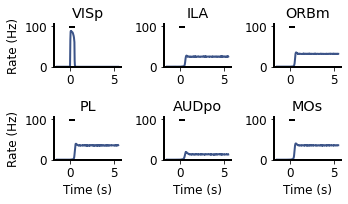

In [6]:
ROIlist = [0,26,30,31,34, 38]
print([area_list[i] for i in ROIlist])
plotAreaList = [i+1 for i in ROIlist] 
plotDynamics(model, plotAreaList, 'FR', True, 2, (5,3), 12, True, 'makeFiguresThal/dynamicsPlot_thal_new.svg')

In [7]:
# noLabelAreas = ['SSp-ll','SSp-ul','SSp-n','SSp-m']
noLabelAreas = ['SSp-ll','SSp-ul','SSp-n','SSp-m', 'SSp-un', 'AUDv', 'SSp-tr', 'VISpl', 'VISrl', 'VISli', 'RSPv',
'RSPagl', 'RSPd', 'GU','PERI','ECT', 'VISal', 'VISC']


8.96E-02


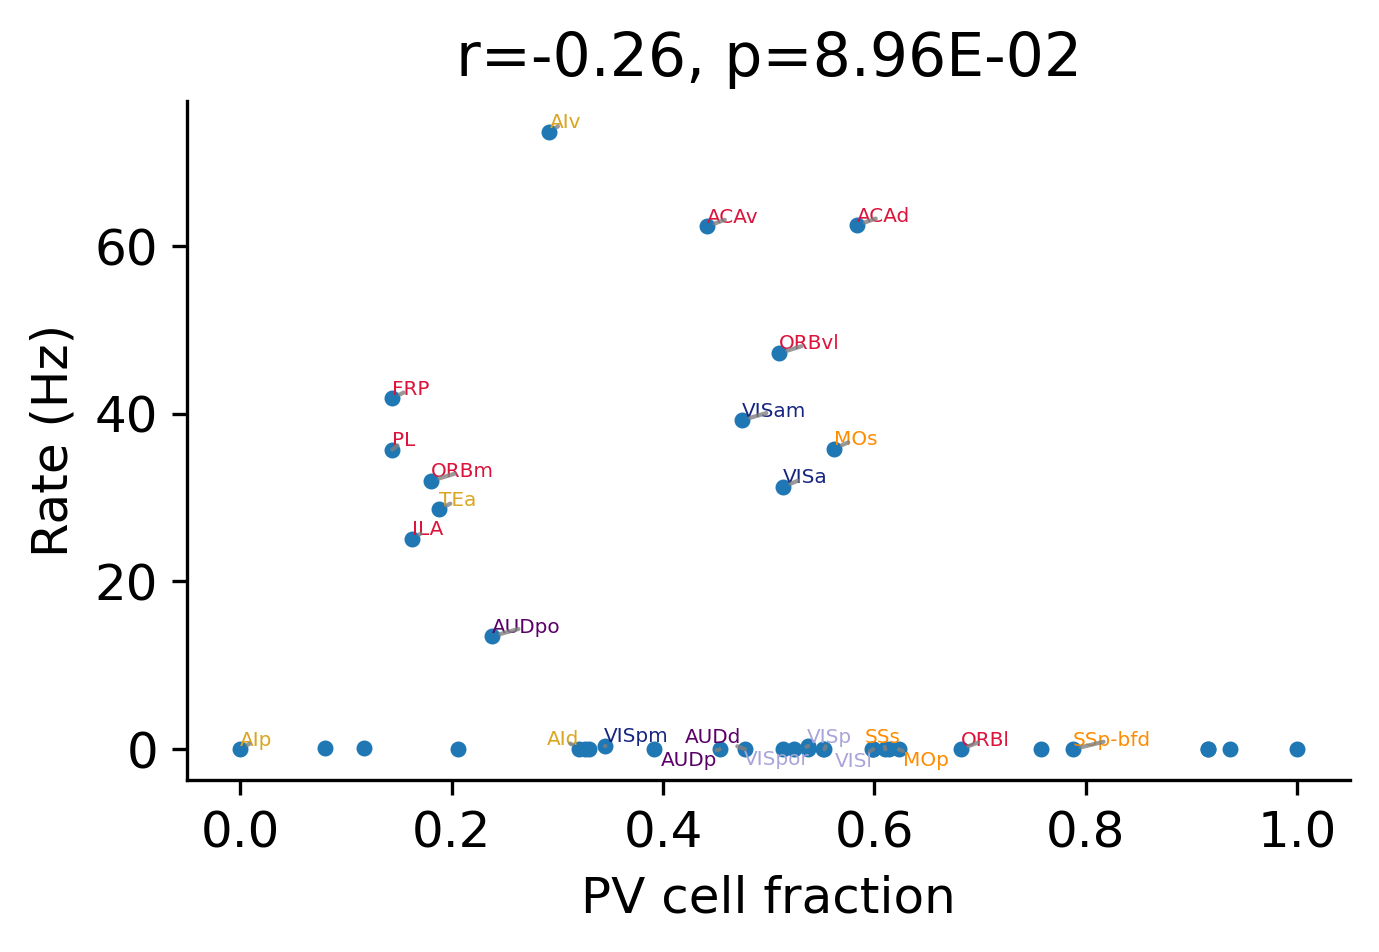

In [8]:
# use the raw PV values not the normalized ones
# plotFRvsPVnotebook(model, True, True, noLabelAreas, 8, (5,3), 12, True, 'makeFiguresThal/FRvsPVnotebook_thal.svg')

# make plot of raw pv vs firing rate
noLabelAreasPV = ['SSp-ll','SSp-ul','SSp-n','SSp-m','SSp-tr','VISli','VISpl','VISrl','RSPd','AUDv','SSs','AUDd','RSPv','VISC']
plotFRvsrawPVnotebook(model, rawPV_df, True, True, noLabelAreasPV, 8, (5,3), 12, True, 'makeFiguresThal/FRvsrawPVnotebook_thal.svg')

1.24E-01


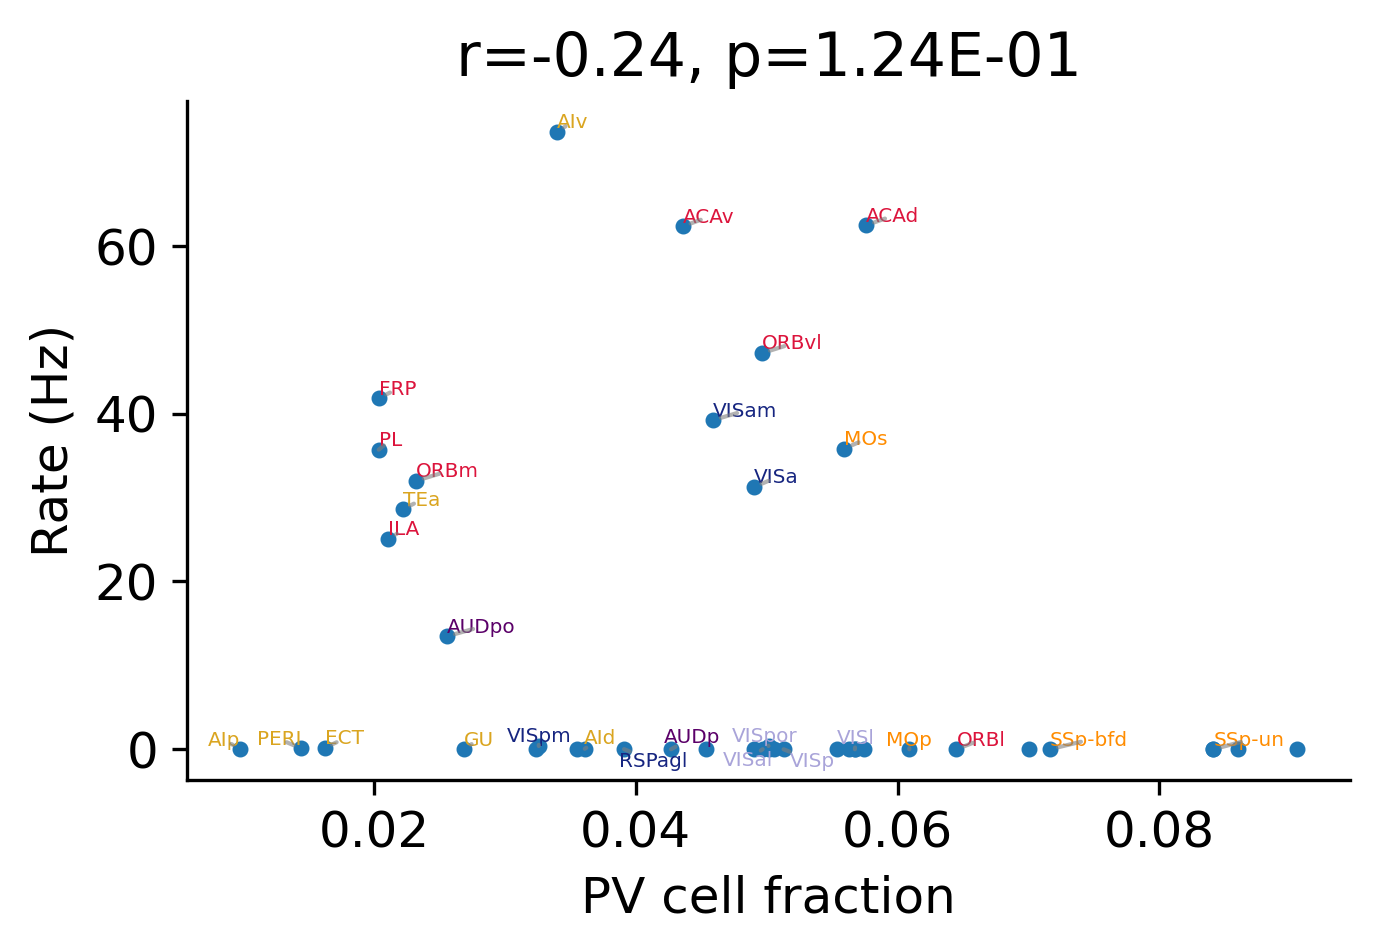

3.79E-10


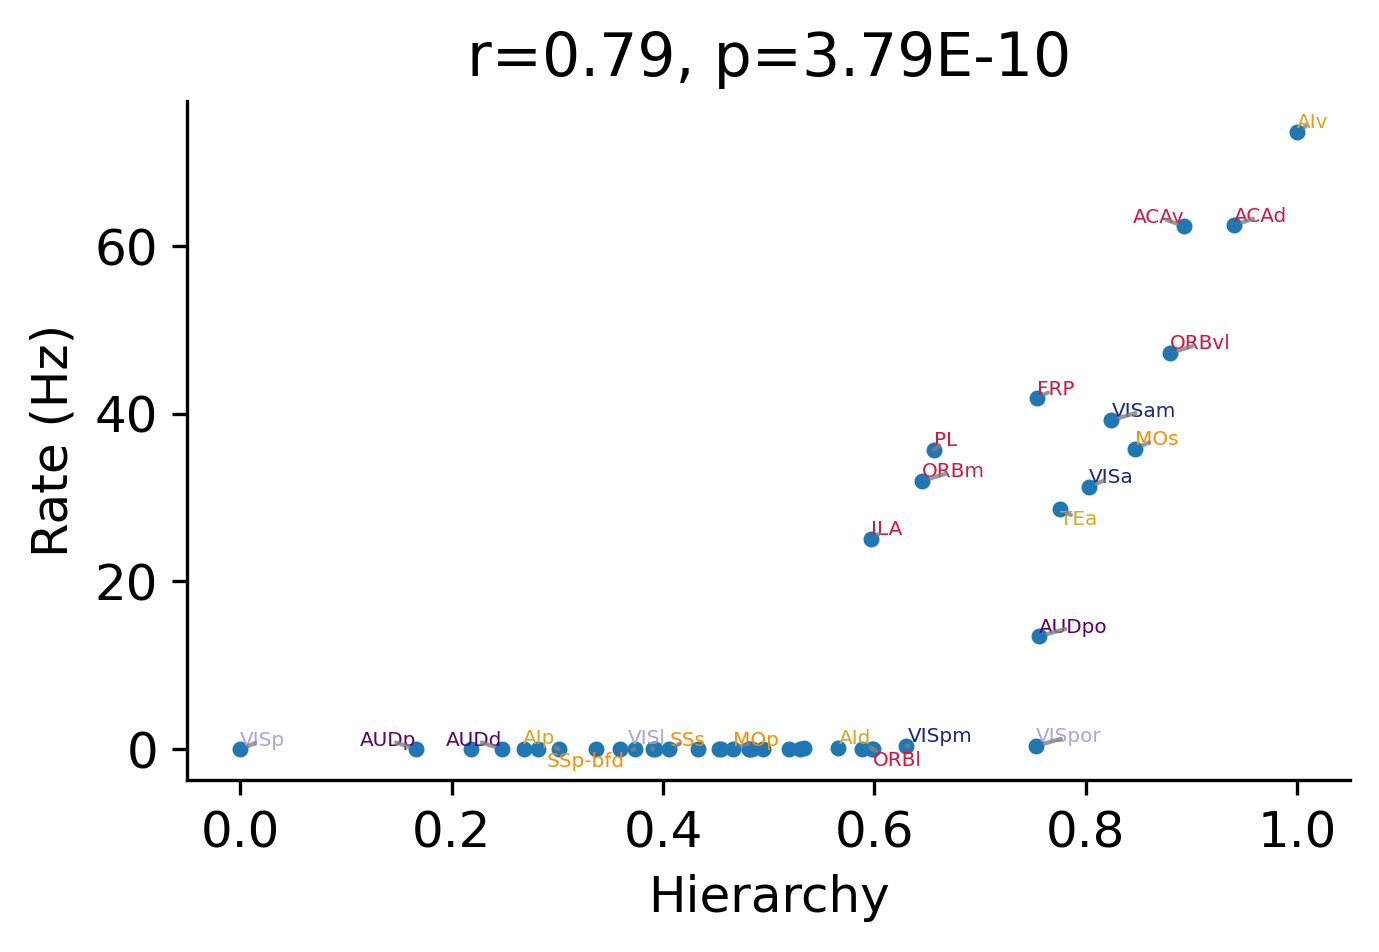

In [16]:
PVHierDf = generatePVHierDf(model, hierarchy_df, rawPV_df)
plotFRvsHiernotebook(model, PVHierDf, True, True, noLabelAreas, 8, (5,3), 12, True, 'makeFiguresThal/FRvsHiernotebook_thal.svg')

In [17]:
# compare Thalamic model with cortex model
with open('results/model_V1.pkl', 'rb') as f:
    model_cortex = pickle.load(f)
# PVHierDf_cortex = generatePVHierDf(model_cortex, hierarchy_df)
# plotFRvsHiernotebook(model_cortex, PVHierDf_cortex, True, True, noLabelAreas, 8, (5,3), 12, False, 'makeFiguresThal/FRvsHiernotebook_cortex.svg')


In [39]:
def plotCortexVSThal(model1, model2, annotation_adjust, showLabel, noLabelAreas, dotSize, figureSize, fontSize, saveFig, fileName):
    p1 = model1.persistentact_df
    p2 = model2.persistentact_df

    div = model1.parameters['div']
    div_name_list = model1.parameters['div_name_list']
    div_color_list = model1.parameters['div_color_list']

    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    # plot FR vs hierarchy
    plt.scatter(p1['persistentact'], p2['persistentact'],
                s=dotSize)
    ax = plt.gca()
    # plt.ylim(-6.5,65) # leave enough space for annotation.
    # add annotation text
    if showLabel:
        texts = []
        xPos = []
        yPos = []
        for i in range(model1.n_areas):
            acr = p1['Acronym'][i]
            if acr in model1.area_list:
                for div_name, div_color in zip(div_name_list, div_color_list):
                    if acr in div[div_name] and acr not in noLabelAreas:
                        xPos += p1['persistentact'][i]
                        yPos += p2['persistentact'][i]
                        texts += [ax.text(p1['persistentact'][i],
                                          p2['persistentact'][i], acr,
                                          color=div_color, fontsize=fontSize*0.4)]

        # # use adjust library to adjust the position of annotations.
        if annotation_adjust:
            adjust_text(texts, xPos, yPos,
                        ax=ax, precision=0.001,
                        arrowprops=dict(arrowstyle='-', color='gray', alpha=.8))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xlabel('Cortical model firing rate (Hz)')
    plt.ylabel('Thalamic model firing rate (Hz)')
    
    a1 = p1['persistentact']
    a2 = p2['persistentact']
    thres = 5
    p1PAidx = list(a1[a1 > thres].index)
    p2PAidx = list(a2[a2 > thres].index)
    commonPAidx = [x for x in p1PAidx if x in p2PAidx]
    p1PA = [a1[k] for k in commonPAidx]
    p2PA = [a2[k] for k in commonPAidx]

    corr, pvalue = sp.stats.pearsonr(p1PA,
                                     p2PA)
    plt.title('r=' + str(round(corr, 2)) + ', p=' + f"{pvalue:.2E}")
    print(f"{pvalue:.2E}")

    # save figure
    if saveFig:
        plt.savefig('figure/' + fileName, dpi=300, bbox_inches='tight',transparent=True)
    # plt.savefig('figure/neurondensity_grad.png',dpi=80,bbox_inches='tight')

In [40]:
noLabelAreasCompare = ['SSp-ll','SSp-ul','SSp-n','SSp-m', 'SSp-un', 'AUDv', 'SSp-tr', 'VISpl', 'VISrl', 'VISli', 'RSPv',
'RSPagl', 'RSPd', 'GU','PERI','ECT', 'VISal', 'VISC', 'ORBl','AId','VISpm','VISpor','VISp','AUDp','SSp-bfd','SSs',
'AUDd','AIp','VISl','MOp']

2.12E-03


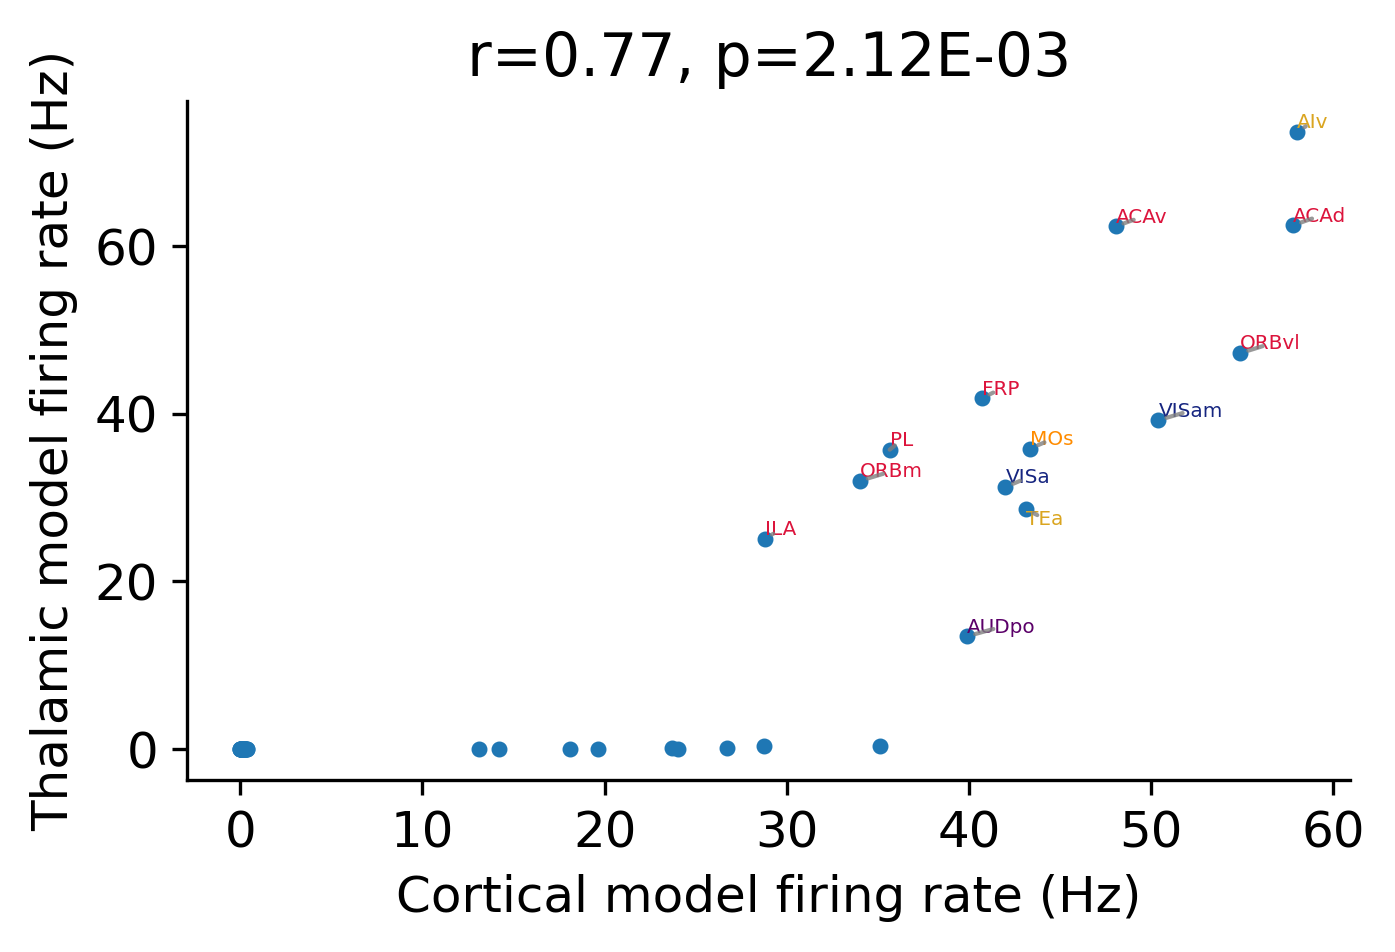

In [41]:
plotCortexVSThal(model_cortex, model, True, True, noLabelAreasCompare, 8, (5,3), 12, True, 'makeFiguresThal/cortexModelFRvsThalModelFR.svg')
    # model1, model2, annotation_adjust, showLabel, noLabelAreas, dotSize, figureSize, fontSize, saveFig, fileName):

In [42]:
def plotThalFRnotebook(model, annotation_adjust, showLabel, dotSize, figureSize, fontSize, saveFig, fileName):

    persistentact_df = model.th_persistentact_df
    persistentact_df_sort = persistentact_df.sort_values(by='th_persistentact').reset_index(drop=True)

    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    # plot FR of thal

    plt.scatter(np.arange(len(persistentact_df_sort)), persistentact_df_sort['th_persistentact'],
                s=dotSize)
    ax = plt.gca()
    # plt.ylim(-6.5,65) # leave enough space for annotation.
    # add annotation text
    if showLabel:
        texts = []
        for i in range(len(persistentact_df_sort)):
            acr = persistentact_df_sort['Acronym'][i]
            if acr in model.thal_areas_list:
                texts += [ax.text(np.arange(len(persistentact_df_sort))[i],
                                persistentact_df_sort['th_persistentact'][i], acr,
                                fontsize=fontSize*0.4)]

        # # use adjust library to adjust the position of annotations.
        if annotation_adjust:
            adjust_text(texts, np.arange(len(persistentact_df_sort)), persistentact_df_sort['th_persistentact'],
                        ax=ax, precision=0.001,
                        arrowprops=dict(arrowstyle='-', color='gray', alpha=.8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xticks([])
    
    plt.xlabel('Thalamic areas')
    plt.ylabel('Rate (Hz)')
    # plt.ylim([-1,8])

#     corr, pvalue = sp.stats.pearsonr(persistentact_df_sort['PVdensity'],
#                                      persistentact_df_sort['persistentact'])
#     plt.title('r=' + str(round(corr, 2)) + ', p=' + f"{pvalue:.2E}")
#     print(f"{pvalue:.2E}")

    # save figure
    if saveFig:
        plt.savefig('figure/' + fileName, dpi=300, bbox_inches='tight',transparent=True)
    # plt.savefig('figure/neurondensity_grad.png',dpi=80,bbox_inches='tight')def 

WARNING    /Users/Allen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)
 [py.warnings]


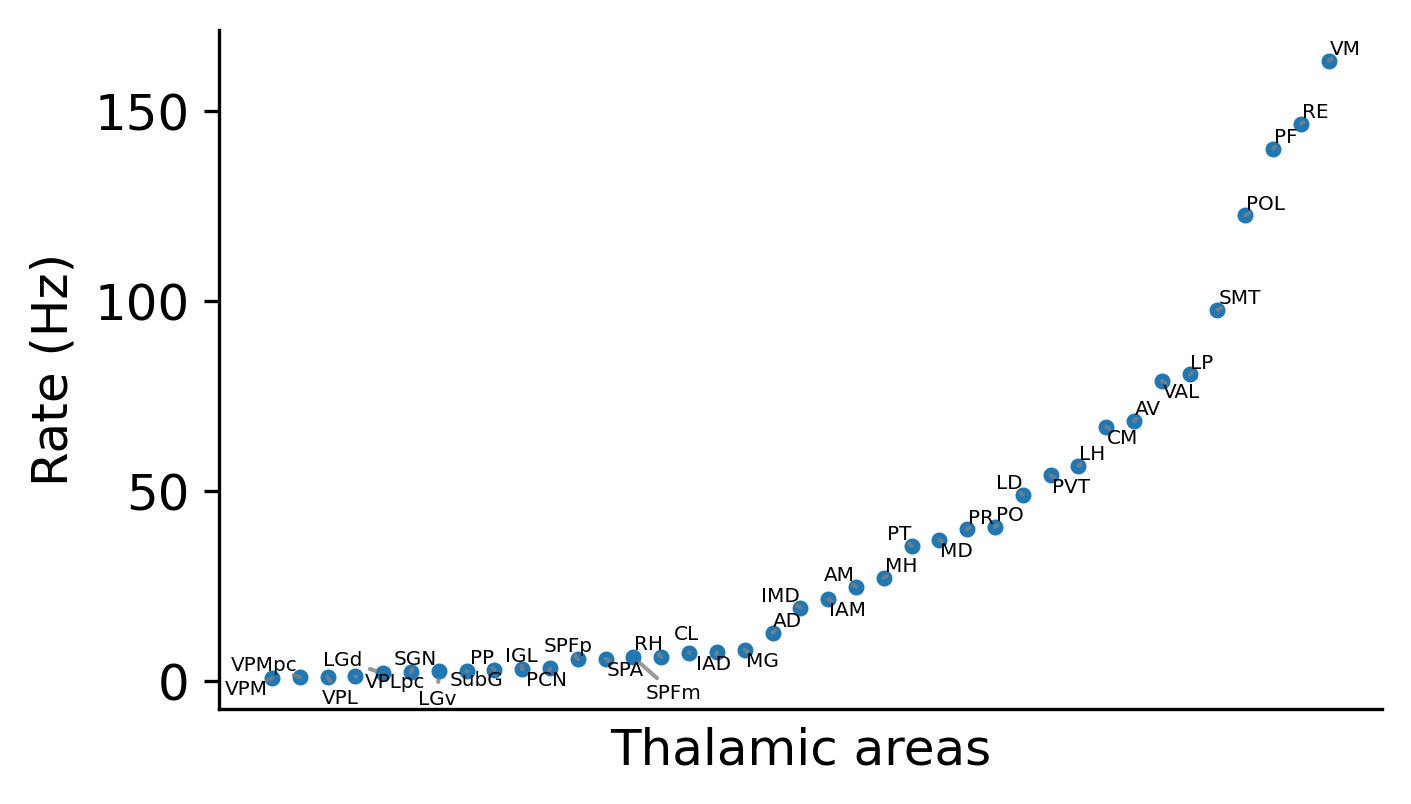

In [43]:
plotThalFRnotebook(model, True, True, 8, (5,3), 12, True, 'makeFiguresThal/thalamicFR_thal.svg')

In [44]:
# # get Thalamus hierarchy.
# THhierfilename = 'mouse_harrishier_th_extracted_published_CC_TC_CT.csv'

# def loadTHhierarchy(filepath, THhierfilename, areas):
#     with open(filepath + THhierfilename, 'rb') as f:
#         THhier_df = pd.read_csv(f, sep=',', names=['area', 'THhier'], header=0)
#     return THhier_df

# thHierdf = loadTHhierarchy('lib/', THhierfilename, thal_list)
# thHierdf.dropna(inplace=True)

In [45]:
# normalize the thalamic hierarchy
a = thal_hierarchy
thal_hierarchy_norm = (a - min(a)) / (max(a) - min(a))


In [46]:
# generate thalamus hierarchy persistent activity DF.
def generateTHHierDf(model, thal_list, thal_hierarchy):
    df = model.th_persistentact_df
    c1, c2, c3 = [], [], []
    for index, row in df.iterrows():
        if row['Acronym'] in thal_list:
            c1.append(row['Acronym'])
            c2.append(thal_hierarchy[index])
            c3.append(row['th_persistentact'])
    df = pd.DataFrame()
    df['Acronym'] = c1
    df['hierarchy'] = c2
    df['persistentact'] = c3
    return df
thFRHierDf = generateTHHierDf(model, thal_list, thal_hierarchy_norm)

In [47]:
thFRHierDf

,Acronym,hierarchy,persistentact
0,VAL,0.701682,78.991450
1,VM,0.999371,163.332408
2,VPL,0.064573,1.076655
3,VPLpc,0.064573,1.178502
4,VPM,0.000000,0.628631
5,VPMpc,0.000000,0.944154
6,SPFm,0.232013,6.178075
7,SPFp,0.232013,5.719848
8,SPA,0.232013,5.772080
9,PP,0.232013,2.940084


In [48]:
# # plot the thalamic firing rate vs the thalamic hierarchy. 
def plotFRvsHierTHALnotebook(thFRHierDf, annotation_adjust, showLabel, noLabelAreas, dotSize, figureSize, fontSize, saveFig, fileName):

    fig = plt.figure(figsize=figureSize, dpi=300, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': fontSize})
    # plot FR vs hierarchy
    plt.scatter(thFRHierDf['hierarchy'], thFRHierDf['persistentact'],
               s=dotSize)
    ax = plt.gca()
    # plt.ylim(-6.5,65) # leave enough space for annotation.
    # add annotation text
    if showLabel:
        texts = []
        xPos = []
        yPos = []
        for i in range(len(thFRHierDf)):
            acr = thFRHierDf['Acronym'][i]
            if acr not in noLabelAreas:
                xPos += thFRHierDf['hierarchy'][i]
                yPos += thFRHierDf['persistentact'][i]
                texts += [ax.text(thFRHierDf['hierarchy'][i],
                                    thFRHierDf['persistentact'][i], acr,
                                    color='#162580', fontsize=fontSize*0.4)]
                        
        # # use adjust library to adjust the position of annotations.
        if annotation_adjust:
            adjust_text(texts, xPos, yPos,
                        ax=ax, precision=0.001,
                        arrowprops=dict(arrowstyle='-', color='gray', alpha=.8))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.setp(ax.spines.values(), linewidth=3)
    # ax.xaxis.set_tick_params(width=7)
    # ax.yaxis.set_tick_params(width=7)

    plt.xlabel('Thalamic hierarchy')
    plt.ylabel('Rate (Hz)')
    # plt.ylim([-1,8])

    corr, pvalue = sp.stats.pearsonr(thFRHierDf['hierarchy'],
                                     thFRHierDf['persistentact'])
    plt.title('r=' + str(round(corr, 2)) + ', p=' + f"{pvalue:.2E}")
    print(f"{pvalue:.2E}")

    # save figure
    if saveFig:
        plt.savefig('figure/' + fileName, dpi=300, bbox_inches='tight',transparent=True)

2.75E-18


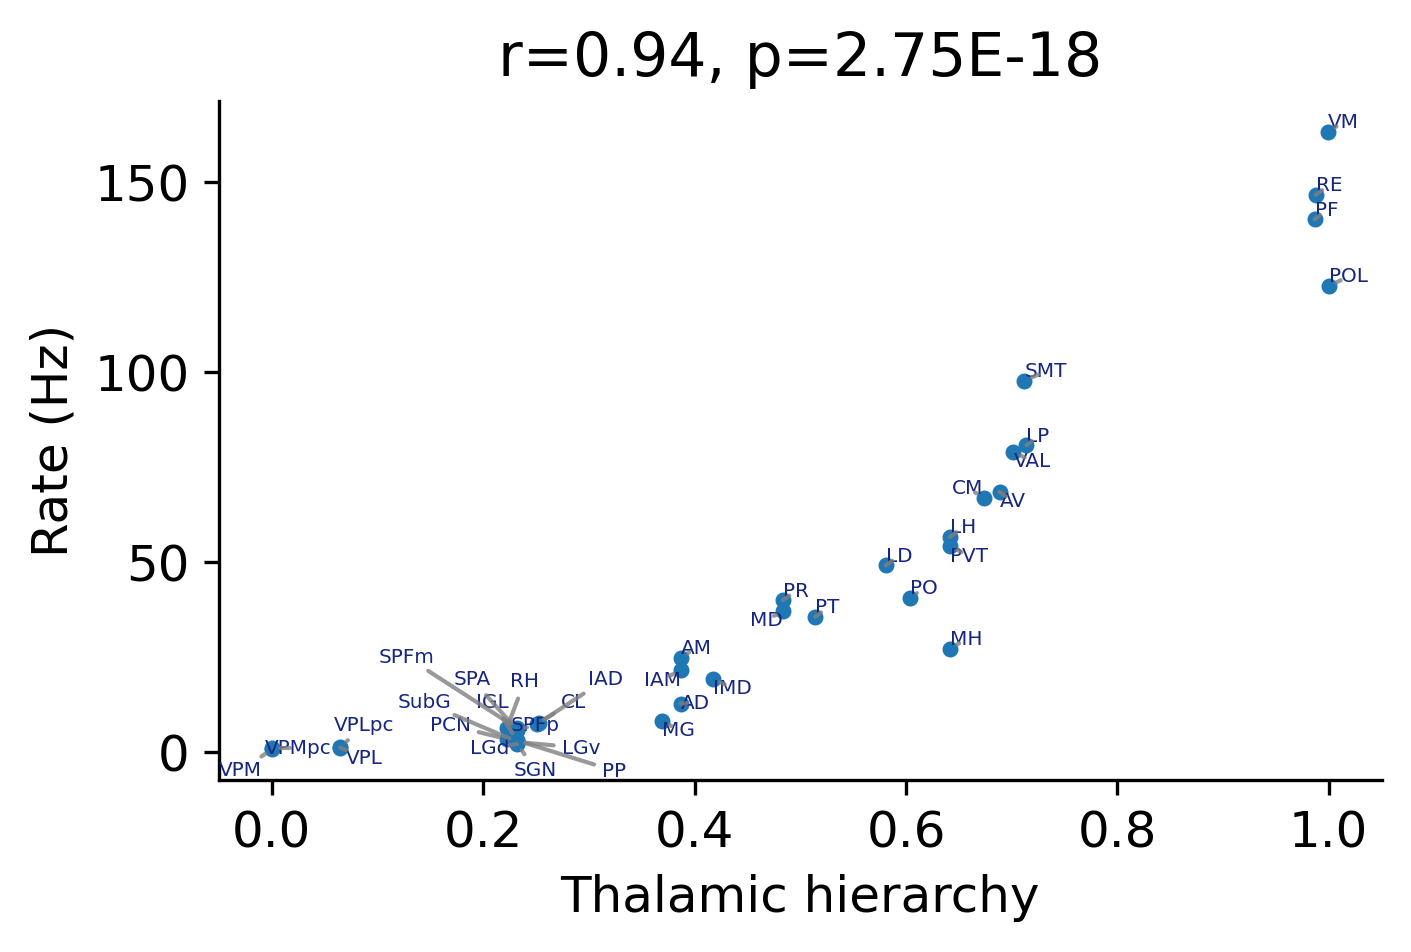

In [49]:
plotFRvsHierTHALnotebook(thFRHierDf, True, True, [], 8, (5,3), 12, True, 'makeFiguresThal/thFRvsHier.svg')

In [50]:
# # load no Thalamus model

with open('results/model_V1_thal_noThal.pkl', 'rb') as f:
    modelNoThal = pickle.load(f)

1.10E-14


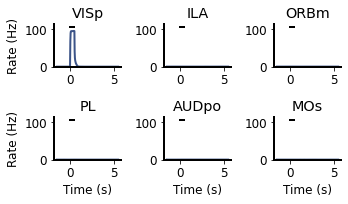

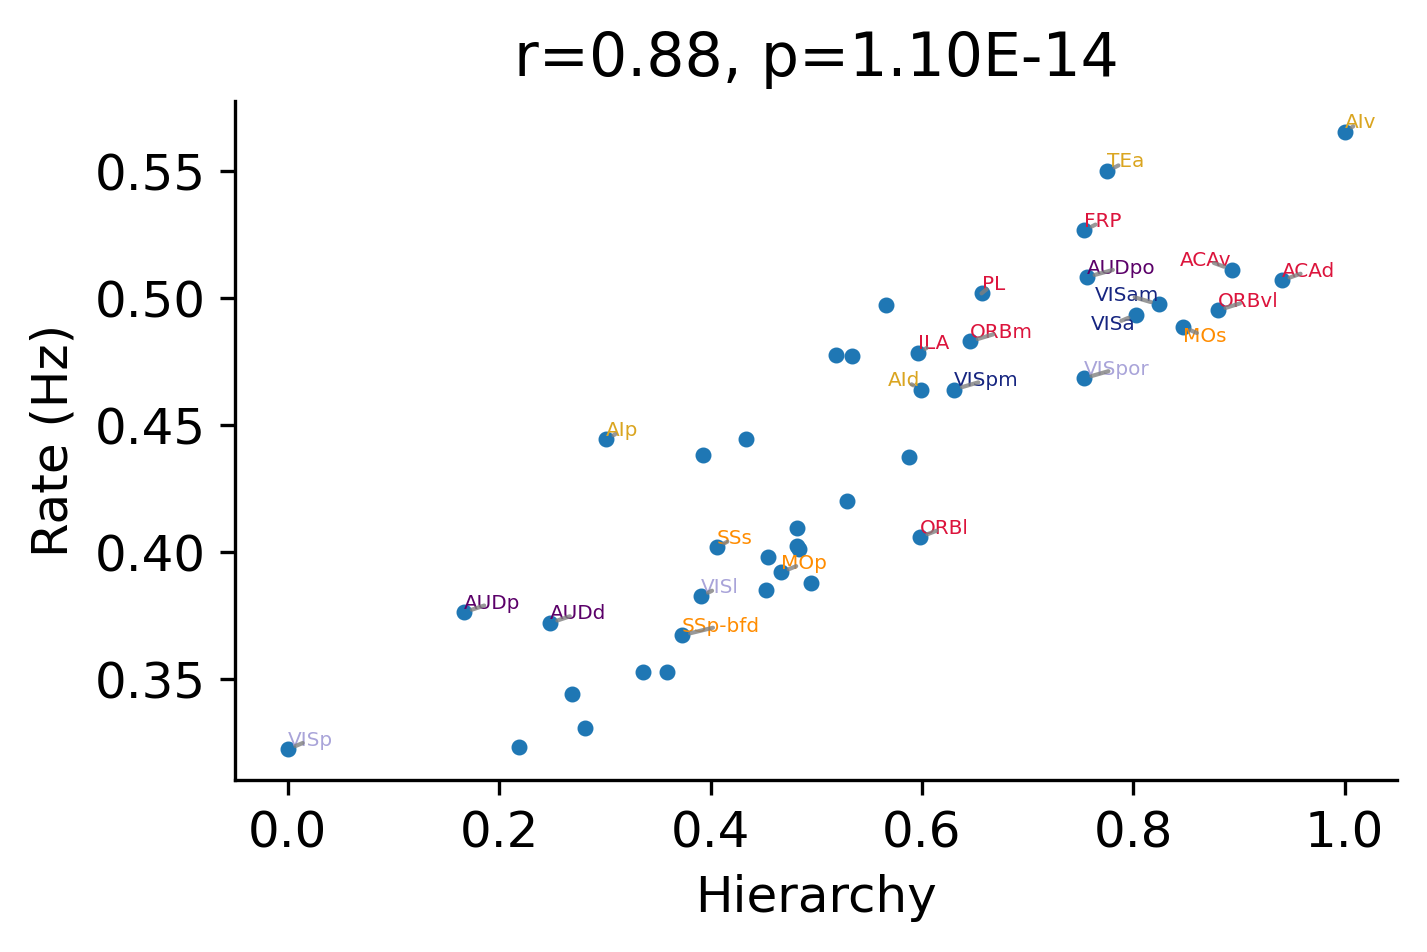

In [52]:
plotDynamics(modelNoThal, plotAreaList, 'FR', True, 2, (5,3), 12, True, 'makeFiguresThal/dynamicsPlot_thal_NOThal.svg')
PVHierDfNoThal = generatePVHierDf(modelNoThal, hierarchy_df, rawPV_df)
plotFRvsHiernotebook(modelNoThal, PVHierDfNoThal, True, True, noLabelAreas, 8, (5,3), 12, True, 'makeFiguresThal/FRvsHiernotebook_thal_NOThal.svg')

2.25E-09


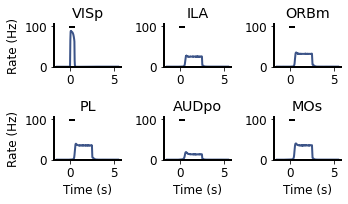

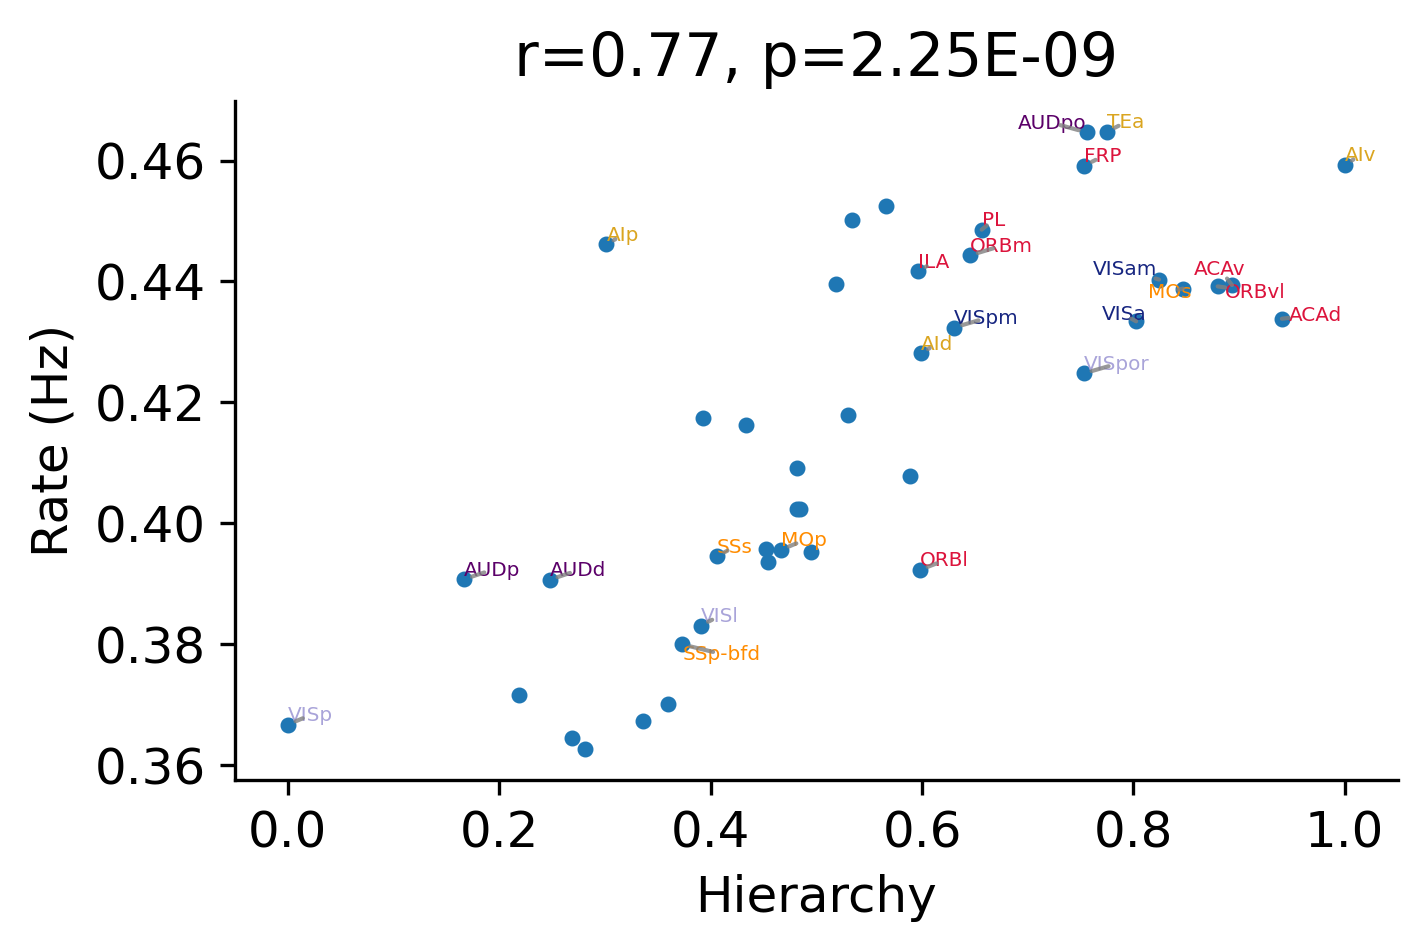

In [53]:
# # load Thalamus inhibition model 
with open('results/model_V1_thal_inhibitThal.pkl', 'rb') as f: 
    modelInhibitThal = pickle.load(f) 
    
plotDynamics(modelInhibitThal, plotAreaList, 'FR', True, 2, (5,3), 12, True, 'makeFiguresThal/dynamicsPlot_thal_InhibitThal.svg') 
PVHierDfInhibitThal = generatePVHierDf(modelInhibitThal, hierarchy_df, rawPV_df) 
plotFRvsHiernotebook(modelInhibitThal, PVHierDfInhibitThal, True, True, noLabelAreas, 8, (5,3), 12, True, 'makeFiguresThal/FRvsHiernotebook_thal_InhibitThal.svg') 

In [54]:
def plotDynamicsTwo(modelList, plotAreaList, colorList, labelList, Yaxis, sameYaxisLimit, lineWidth, figureSize, fontSize, saveFig, fileName):
    
    model1, model2 = modelList

    if len(modelList) != len(colorList):
        raise ValueError('modelList and colorList must have the same length.')
        return

    # generate figures for specific areas. # sixplots
    if model1.parameters['stim_on'] != model2.parameters['stim_on']:
        raise ValueError('stim_on is not the same in two models.')
        return
    start = model1.parameters['stim_on']
    plot_start_time = 0.5
    if model1.trial_length != model2.trial_length:
        raise ValueError('trial_length is not the same in two models.')
        return
    plot_end_time = model1.trial_length/brian2.second -0.5
#     plot_end_time = start/brian2.second + 4
    if model1.dt != model2.dt:
        raise ValueError('dt is not the same in two models.')
        return
    dt = model1.dt
    plt.figure(figsize=figureSize)
    
    k = 1
    # Plot the rates for E1&E2
    plt.rcParams.update({'font.size':fontSize})
    
    popNo = 0
    if Yaxis == 'FR':
        Ylist = [x.R for x in modelList]
        yLabel = 'Rate (Hz)'
        popNo = 0
    elif Yaxis == 'localCurrent':
        Ylist = [x.I_local_NMDA for x in modelList]
        yLabel = 'Local NMDA \n current (A)'
        popNo = 0
    elif Yaxis == 'LRECurrent':
        Ylist = [x.I_LR_NMDA for x in modelList]
        yLabel = 'Long range \n current to E (A)'
        popNo = 0
    elif Yaxis == 'LRICurrent':
        Ylist = [x.I_LR_NMDA for x in modelList]
        yLabel = 'Long range \n current to I (A)'
        popNo = 2
    elif Yaxis == 'synaptic':
        Ylist = [x.S_NMDA for x in modelList]
        yLabel = 'synaptic variable \n  NMDA'
        popNo = 0
    else:
        raise ValueError('Yaxis value error.')
        return
    #get Y max
    
    Y1, Y2 = Ylist[0], Ylist[1]

    Ymax = 0
    for i in plotAreaList:
        for y in Ylist:
            Ymax = max(Ymax, 1.2 * np.max(y[:,i-1,popNo]))

    
    X = np.arange(plot_start_time*brian2.second - start, plot_end_time*brian2.second - start, dt)
    for i in plotAreaList:
        plt.subplot(2,3,k)
        ax = plt.gca()
        # plot the firing of first pop
        for j in range(len(Ylist)):
            y = Ylist[j]
            ax.plot(X, y[np.arange(int(plot_start_time/dt), int(plot_end_time/dt), 1), i-1, popNo],
                     color=colorList[j], linewidth=lineWidth, label=labelList[j]) # '#3C5488FF'
        
        # plot the firing of second pop # TODO need to change the code; does not work for distractionInput.
        if model1.parameters['distractionInput'] or model2.parameters['distractionInput']:
            for y in Ylist:
                ax.plot(X, y[np.arange(int(plot_start_time/dt), int(plot_end_time/dt), 1), i-1, 1],
                     color='orange', linewidth=lineWidth)    

        if sameYaxisLimit:
            plt.ylim((0, Ymax))
            
        # Plot the stimulation duration bar
        if plot_end_time<25:
            Ypos = Ymax * 1.1 / 1.2
            ax.plot([model2.stim_on - start, model2.stim_off - start], [Ypos, Ypos],
                     color='black', linewidth=lineWidth)
            if model1.parameters['distractionInput']:
                ax.plot([model1.parameters['distract_on'] - start, model1.parameters['distract_off'] - start], [Ypos, Ypos],
                     color='green', linewidth=lineWidth)
            if model2.parameters['distractionInput']:
                ax.plot([model2.parameters['distract_on'] - start, model2.parameters['distract_off'] - start], [Ypos, Ypos],
                     color='green', linewidth=lineWidth)
            
            if model1.parameters['inhibitoryInput']:
                ax.plot([model1.parameters['inh_stim_on'] - start, model1.parameters['inh_stim_off'] - start], [Ypos, Ypos],
                     color='#D3023E', linewidth=lineWidth)
            if model2.parameters['inhibitoryInput']:
                ax.plot([model2.parameters['inh_stim_on'] - start, model2.parameters['inh_stim_off'] - start], [Ypos, Ypos],
                     color='#D3023E', linewidth=lineWidth)
        
        plt.title(model1.area_list[i-1])
        # hide the frames
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.setp(ax.spines.values(), linewidth=lineWidth)

        if k >= 4:
            plt.xlabel('Time (s)')
        if k%3 == 1:
            plt.ylabel(yLabel)
            
        # add shade to inhibition.

    #     if inh_multiarea != None:
    #         for j in np.arange(len_inhmulti):
    #             if area_list[i-1] == inh_multiarea[j]:
    #                 plt.axvspan(inhibition_on,inhibition_off,facecolor='b',alpha=0.1)  

        k+= 1

    # add legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper center')
    # plt.legend(handles, labels)

    plt.tight_layout()
    if saveFig:
        plt.savefig('figure/' + fileName, dpi=300, bbox_inches='tight', transparent=True)

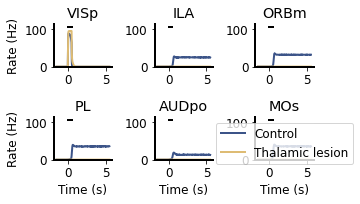

In [55]:
# compare thalamic model, no thalamic model and thalamic model with thalamic inhibition. 
plotDynamicsTwo([model, modelNoThal], plotAreaList, ['#3C5488FF','#DEBC74'], ['Control','Thalamic lesion'], 'FR', True, 2, (5,3), 12, True, 'makeFiguresThal/dynamicsPlot_compareLesion.svg')

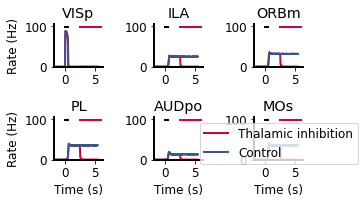

In [56]:
# compare thalamic model, no thalamic model and thalamic model with thalamic inhibition. 
plotDynamicsTwo([modelInhibitThal, model], plotAreaList, ['#D3023E', '#3C5488FF'], ['Thalamic inhibition', 'Control'], 'FR', True, 2, (5,3), 12, True, 'makeFiguresThal/dynamicsPlot_compareInhibtion.svg')